Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Liuda Serohina"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

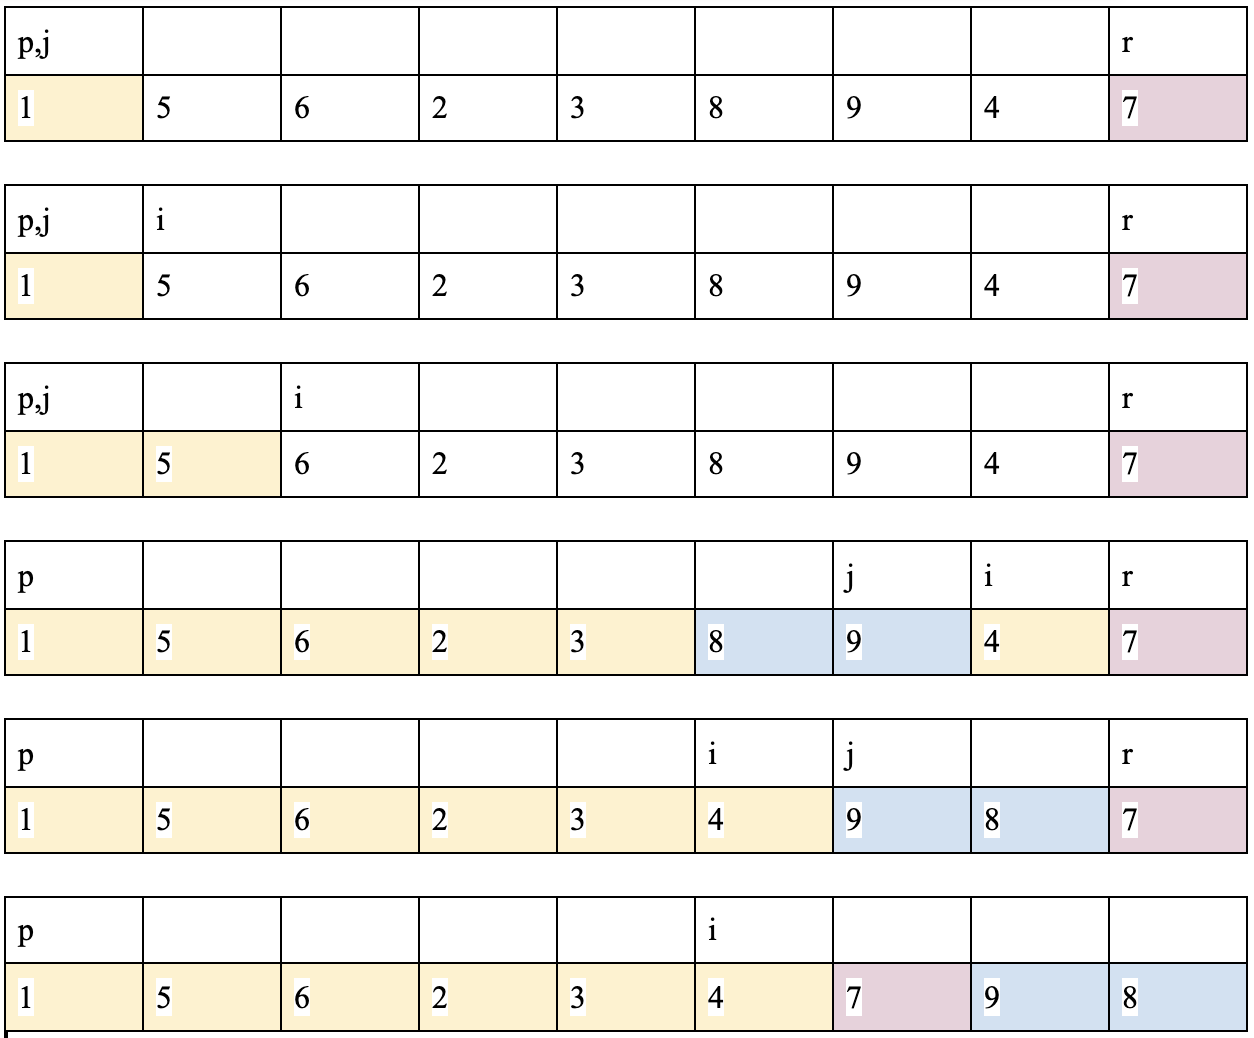

1. Array after partition: A = [1,5,6,2,3,4,7,9,8]
2. The value of i is at index 5, element of value 4

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [5]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    This function implements partition of the input array
    
    """
    x = A[r] # Assign the pivot element
    i = p - 1 # Set i before the first element of array
    for j in range(p, r): # Traverse thru the whole length of input array
        if A[j] <= x: # If j <= the pivot element
            i = i + 1 # Step up
            A[i], A[j] = A[j], A[i] # Swap the indeces
    A[i+1], A[r] = A[r], A[i+1] # Finish by locating the pivot element after all elements < than the pivot element 
    return i+1

In [6]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [7]:
def quick_sort(A,p,r):
    """
    This function implements quicksort using the previously written partition function
    
    """
    if p < r: 
        q = partition(A, p, r) # Assign q to partition function
        quick_sort(A, p, q - 1) # Recursively call quicksort on the first part of the array
        quick_sort(A, q + 1, r) # Recursively call quicksort on the second part of the array
    return A

In [8]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

AssertionError: 

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [9]:
import matplotlib.pyplot as plt
import time

**All elements of array A have the same value**

In [21]:
time_quicksort1 = []
l_list = [11,11,11,11,11]

for i in range(1,101):
    total_time = 0
    for j in range(100):
        start = time.time()
        quick_sort(l_list, 0, len(l_list)-1)
        end = time.time()
        total_time += end-start
    time_quicksort1.append(total_time)

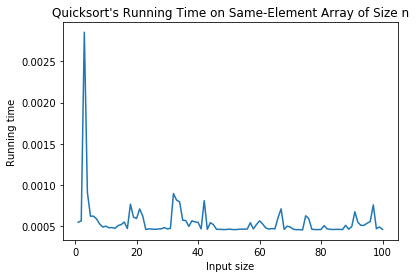

In [22]:
inp_size = [i for i in range (1,101)]
plt.plot(inp_size, time_quicksort)
plt.ylabel('Running time')
plt.xlabel("Input size")
plt.title("Quicksort's Running Time on Same-Element Array of Size n")
plt.show()

**Explanation:**
We would expect the plot to show quadratical progression since quicksort runs in O(n^2). This means that something is wrong either with the function or with the way I obtained the time measure. 

**Array A contains distinct elements sorted in decreasing order**

In [24]:
time_quicksort2 = []
ll_list = [9, 6, 5, 2, 0, -9]

for i in range(1,101):
    total_time = 0
    for j in range(100):
        start = time.time()
        quick_sort(ll_list, 0, len(ll_list)-1)
        end = time.time()
        total_time += end-start
    time_quicksort2.append(total_time)

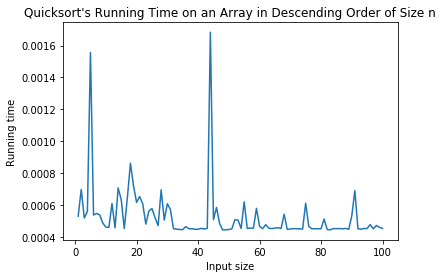

In [25]:
inp_size2 = [i for i in range (1,101)]
plt.plot(inp_size2, time_quicksort2)
plt.ylabel('Running time')
plt.xlabel("Input size")
plt.title("Quicksort's Running Time on an Array in Descending Order of Size n")
plt.show()

**Explanation:** Same issue, unfortunately. This is not something we'd expect to see, which means that there's an error either in the functions or in the time estimation. 